<a href="https://colab.research.google.com/github/Vidarr22/BML-LCA-2-3-./blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Shape of dataset: (303, 14)

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Accuracy: 0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

   

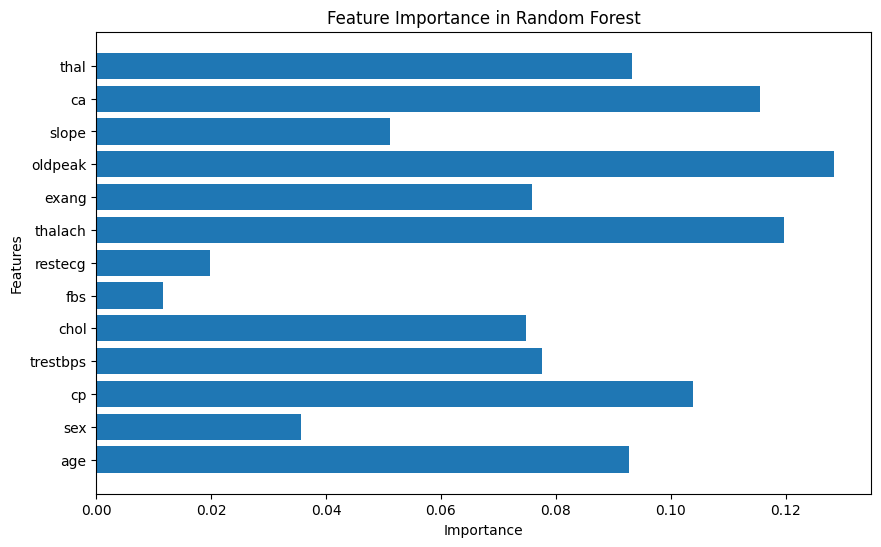

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1: Load the dataset (UCI Heart Disease dataset)
url = "https://raw.githubusercontent.com/Ankit152/Heart-Disease-Prediction/master/heart.csv"
data = pd.read_csv(url)

# 2: Explore the dataset
print("First 5 rows:")
print(data.head())
print("\nShape of dataset:", data.shape)
print("\nMissing values:")
print(data.isnull().sum())

# 3: Split data into features and target
X = data.drop("target", axis=1)
y = data["target"]

# 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6: Predictions
y_pred = rf_model.predict(X_test)

# 7: Evaluate model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 8: Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
